# Parametric Koopman Learning Tests on Duffing Oscillator

In [1]:

import PKoopmanDL as pkdl
import numpy as np
import matplotlib.pyplot as plt
import torch

config_file = "paramkoopman.json"
nontrain_func = lambda x: torch.cat([torch.ones((x.shape[0], 1)), x], dim=1)
solver = pkdl.SolverWrapper(nontrain_func, config_file)
K = solver.solve()

CUDA is available. GPU is being used.


Training: 100%|██████████| 100/100 [02:33<00:00,  1.54s/it, loss=5.51e-04]


## Plot

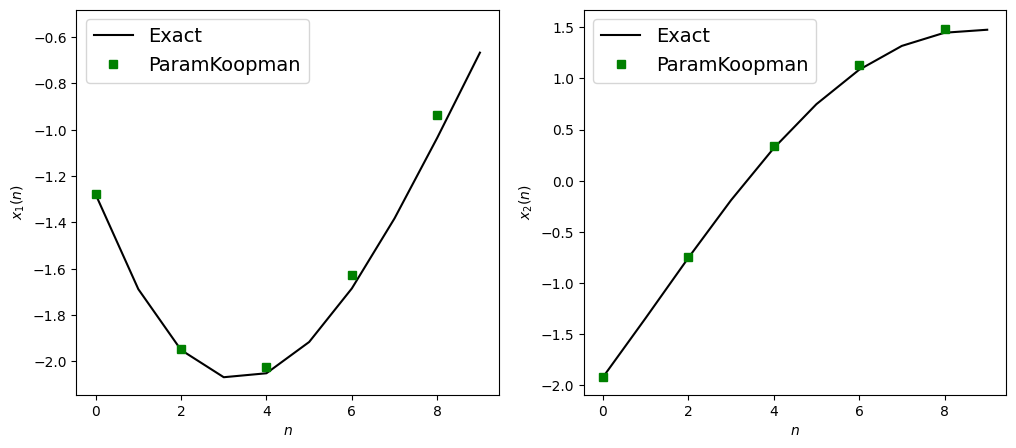

In [2]:
# predict
param = torch.tensor([[0.5, 1.0, 0.0]]).detach()
dataset_predict = pkdl.ODEDataSet(solver.ode, solver.flowmap)
dataset_predict.generate_data(1, solver.traj_len, solver.x_min, solver.x_max, param)
x0 = torch.unsqueeze(dataset_predict.data_x[0], dim=0)
p = K.predict(param, x0, solver.dictionary, solver.dim_nontrain, solver.traj_len).detach()
x_est_traj = p[0, :, :]

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(12,5))  
t_grid = np.arange(0, solver.traj_len)
x_traj = dataset_predict.data_x
ax1.plot(t_grid, x_traj[:,0], 'k-', label='Exact', markevery=2)
ax1.plot(t_grid, x_est_traj[:,1], 'gs', label='ParamKoopman', markevery=2)

ax2.plot(t_grid, x_traj[:,1], 'k-', label='Exact', markevery=2)
ax2.plot(t_grid, x_est_traj[:,2], 'gs', label='ParamKoopman', markevery=2)

ax1.set_xlabel(r"$n$")
ax1.set_ylabel(r"$x_{1}(n)$")
ax1.legend(loc='best',prop={'size':14})

ax2.set_xlabel(r"$n$")
ax2.set_ylabel(r"$x_{2}(n)$")
ax2.legend(loc='best',prop={'size':14})